In [91]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [92]:
img = cv2.imread("../images/test_a0_5.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[[  0  63 127 191 255 255]
 [  0 255 254 255 191 191]
 [255   0   1   0 127 127]
 [255 191 127  63   0  63]]


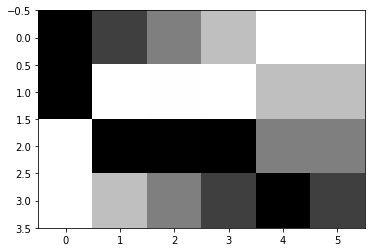

In [93]:
print(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

[[255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255   0   0 255 255 255]
 [255 255 255   0   0 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


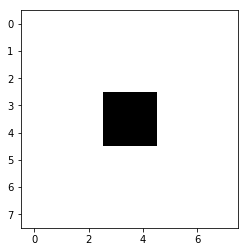

In [94]:
img = np.array([[255, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 0, 0, 255, 255, 255],
                [255, 255, 255, 0, 0, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255]], dtype = np.uint8)
print(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

## Ссылки

https://docs.opencv.org/4.1.0/d3/d94/samples_2cpp_2tutorial_code_2ImgTrans_2Sobel_Demo_8cpp-example.html#a13
https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html

#### Замечение

`borderType` - бесполезен. Между `cv2.BORDER_ISOLATED` и `cv2.BORDER_CONSTANT` разницы нет.

In [95]:
def calculate_sobel_opencv(img):
    g_x = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3, borderType=cv2.BORDER_ISOLATED)
    g_y = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3, borderType=cv2.BORDER_ISOLATED)
    sobel = np.absolute(g_x) // 6 + np.absolute(g_y) // 6
    sobel = np.uint8(sobel)
    return sobel, g_x, g_y

## Эталонная реализация алгоритма на Python

In [96]:
def calculate_sobel(img):
    """
    Apply sobel operator to the image
    G_x = C(A, k_x)
    G_y = C(A, k_y)
    G = |G_x| / 8 + |G_y| / 8
    
    1 / 8 - to fit result to np.uint8
    
    Input image should be a 2D numpy array.
    Output image has the same dimensions. 
    Boundary points will be filled with zeros.
    """
    # Gradient kernels
    k_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.int8)

    k_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.int8)

    # Arrays for gradients
    g_x = np.zeros((img.shape[0], img.shape[1]))
    g_y = np.zeros((img.shape[0], img.shape[1]))

    # Process points
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            # Calculate correlation functions for each point
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    g_x[y, x] += img[y + i, x + j] * k_x[i + 1, j + 1]
                    g_y[y, x] += img[y + i, x + j] * k_y[i + 1, j + 1]

    # Calculate gradient l1 norm
    g = np.abs(g_x) // 6 + np.abs(g_y) // 6
    g = np.array(g, dtype=np.uint8)
    return g, g_x, g_y

In [97]:
sobel_ocv, g_ocv_x, g_ocv_y = calculate_sobel_opencv(img)
sobel, g_x, g_y = calculate_sobel(img)

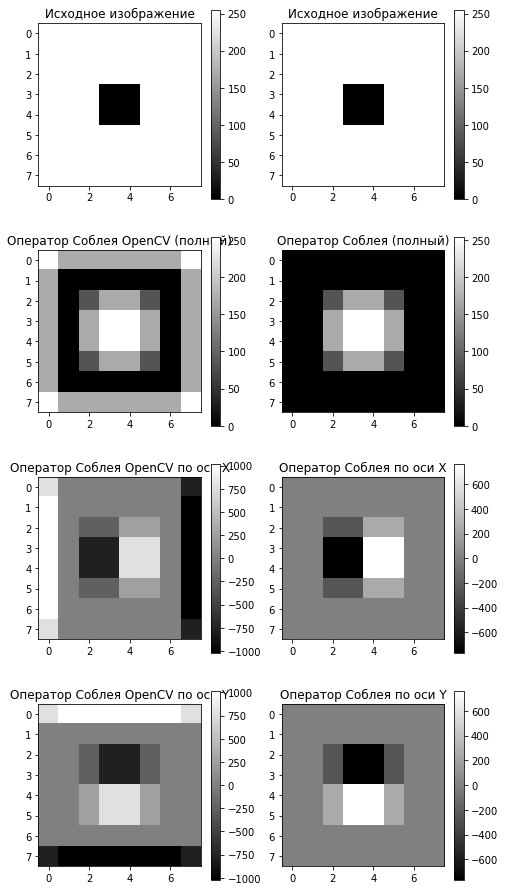

In [98]:
plt.figure(figsize=(8, 16))

plt.subplot(4, 2, 1)
plt.title("Исходное изображение")
plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 2)
plt.title("Исходное изображение")
plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 3)
plt.title("Оператор Соблея OpenCV (полный)")
plt.imshow(sobel_ocv, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 4)
plt.title("Оператор Соблея (полный)")
plt.imshow(sobel, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 5)
plt.title("Оператор Соблея OpenCV по оси X")
plt.imshow(g_ocv_x, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 6)
plt.title("Оператор Соблея по оси X")
plt.imshow(g_x, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 7)
plt.title("Оператор Соблея OpenCV по оси Y")
plt.imshow(g_ocv_y, cmap=plt.cm.gray)
plt.colorbar()

plt.subplot(4, 2, 8)
plt.title("Оператор Соблея по оси Y")
plt.imshow(g_y, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [99]:
sobel

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  84, 169, 169,  84,   0,   0],
       [  0,   0, 169, 254, 254, 169,   0,   0],
       [  0,   0, 169, 254, 254, 169,   0,   0],
       [  0,   0,  84, 169, 169,  84,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [100]:
img = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
sobel, g_x, g_y = calculate_sobel(img)
sobel

array([[0, 0, 0],
       [0, 5, 0],
       [0, 0, 0]], dtype=uint8)

Max sobel: 223
Max opencv: 223


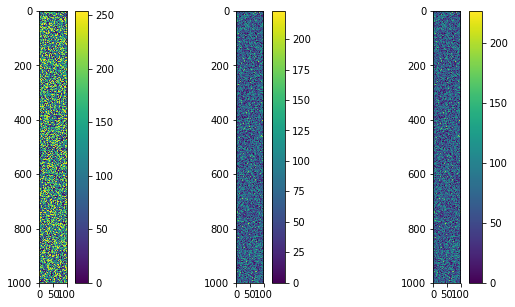

In [132]:
rand_img = np.random.rand(1000, 100)
rand_img = np.asarray(rand_img * 255, dtype = np.uint8)

rand_sobel_opencv, _, _ = calculate_sobel_opencv(rand_img)
rand_sobel, _, _ = calculate_sobel(rand_img)

print("Max sobel:", np.max(rand_sobel_opencv[1:-1, 1:-1]))
print("Max opencv:", np.max(rand_sobel[1:-1, 1:-1]))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(rand_img)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(rand_sobel)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(rand_sobel_opencv)
plt.colorbar()

plt.show()

array([2])

In [109]:
img = rand_img
g_x = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3, borderType=cv2.BORDER_ISOLATED)
g_y = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3, borderType=cv2.BORDER_ISOLATED)
sobel = np.absolute(g_x) // 8 + np.absolute(g_y) // 8 
sobel = np.uint8(sobel)
sobel.shape

(1000, 1000)

In [135]:
t = np.array([[0, 0, 0],
              [0, 0, 255],
              [0, 255, 255]])
t = np.asarray(t, dtype = np.uint8)

s, _, _ = calculate_sobel(t)
s, _, _ = calculate_sobel_opencv(t)
print(s)

[[  0  84  85]
 [ 84 254 169]
 [ 85 169 170]]
